In [1]:
!pip install decision-tree-id3

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import six

In [5]:
import sys

In [6]:
sys.modules['sklearn.externals.six']=six

In [7]:
from id3 import Id3Estimator

In [8]:
data=pd.read_csv('id3exam.csv')

In [9]:
data.head(5)

,Restaurant,Meal,Day,Cost,Vegan,AllergicReaction?
0,Kim's,Breakfast,Saturday,Expensive,Yes,No
1,Kim's,Lunch,Sunday,Cheap,No,No
2,Sam's,Breakfast,Saturday,Expensive,No,Yes
3,Kim's,Breakfast,Friday,Cheap,Yes,Yes
4,Sam's,Breakfast,Saturday,Cheap,Yes,No


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [14]:
data['Restaurant']=le.fit_transform(data['Restaurant'])
data['Meal']=le.fit_transform(data['Meal'])
data['Day']=le.fit_transform(data['Day'])
data['Cost']=le.fit_transform(data['Cost'])
data['Vegan']=le.fit_transform(data['Vegan'])
data['AllergicReaction?']=le.fit_transform(data['AllergicReaction?'])






In [15]:
y=data['AllergicReaction?']
x=data.drop(['AllergicReaction?'],axis=1)

In [16]:
x

,Restaurant,Meal,Day,Cost,Vegan
0,0,0,1,1,1
1,0,1,2,0,0
2,1,0,1,1,0
3,0,0,0,0,1
4,1,0,1,0,1
5,0,1,0,1,1
6,1,0,1,1,0
7,1,1,1,0,0
8,0,0,2,0,0
9,1,0,1,1,1


In [17]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
11    0
12    1
Name: AllergicReaction?, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)

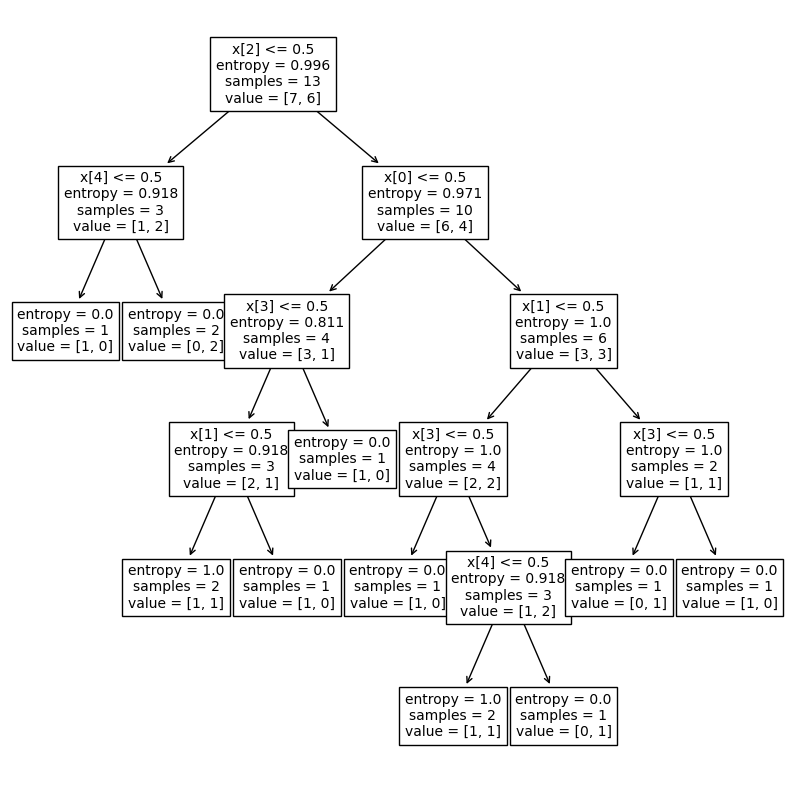

In [19]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(x_train,y_train)
clf.fit(x,y)
fig,ax=plt.subplots(figsize=(10,10))
tree.plot_tree(clf,fontsize=10)
plt.show()

In [20]:
print(tree.export_text(clf))

|--- feature_2 <= 0.50
|   |--- feature_4 <= 0.50
|   |   |--- class: 0
|   |--- feature_4 >  0.50
|   |   |--- class: 1
|--- feature_2 >  0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 0
|   |--- feature_0 >  0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0



In [21]:
x_pred=clf.predict(x_test)

In [24]:
from id3 import Id3Estimator
from sklearn.metrics import classification_report

estimator = Id3Estimator()
estimator.fit(x_train, y_train)
x_pred = estimator.predict(x_test)
print(classification_report(y_test, x_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.14      1.00      0.25         1

    accuracy                           0.14         7
   macro avg       0.07      0.50      0.12         7
weighted avg       0.02      0.14      0.04         7



/home/pllab/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pllab/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pllab/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,x_pred))

0.14285714285714285
